## Support Vector Regression

Three types of SVRs..
  
    Linear
    Polynomial
    Gaussian
 
 
SVR maintains that the error margin do not cross a particular threshold


Since this is regression, it is not considering how close it is to thhe real value, instead, it makes us limit the error also called Epsilon. 


Gaussian Kernel is one of the prominent Kernels for SVR.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
dataset = pd.read_csv('https://raw.githubusercontent.com/dipbanik/MyTectraJuly/master/regression/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [25]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [26]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

The following code is important but see what results you get without scaling the values.

This is the interesting part.

If you do not scale the values, it will give you very poor results.

In [0]:


from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = y.reshape(-1, 1)
y = sc_y.fit_transform(y)



In [28]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [29]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [30]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') # Gaussian
regressor.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = regressor.predict(np.array([[6.5]]))

In [0]:
y_pred = regressor.predict(np.array([[4]]))

In [33]:
y_pred

array([0.01454934])

Use the following code only after you have used scaling

In [35]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))
y_pred

array([170370.0204065])

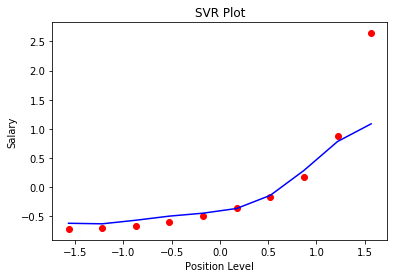

In [36]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('SVR Plot')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()